In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# Creating database connection
conn= sqlite3.connect('inventory.db')

In [4]:
# Fetching the table stored in the database
df= pd.read_sql_query("select * from Vendor_Sales_Summary", conn)
df.head()

,VendorName,VendorNumber,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,BROWN-FORMAN CORP,1128,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.30,0.9791,1.339
1,MARTIGNETTI COMPANIES,4425,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.06,0.9769,1.267
2,PERNOD RICARD USA,17035,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.68,0.9986,1.328
3,DIAGEO NORTH AMERICA INC,3960,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.14,0.9937,1.372
4,DIAGEO NORTH AMERICA INC,3960,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.41,0.9836,1.397


In [5]:
df.shape

(10692, 18)

In [6]:
# Numerical columns statistics summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.0000,7153.0000,9552.000000,201359.000
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.5000,18761.5000,25514.250000,90631.000
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.8400,10.4550,19.482500,5681.810
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.9900,15.9900,28.990000,7499.990
Volume,10692.0,8.473605e+02,664.309212,50.00,750.0000,750.0000,750.000000,20000.000
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.0000,262.0000,1975.750000,337660.000
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.4575,3655.4650,20738.245000,3811251.600
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.2200,5298.0450,28396.915000,5101919.510
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.7100,2857.8000,16059.562500,672819.310
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.0000,261.0000,1929.250000,334939.000


In [7]:
numerical_cols= df.select_dtypes(include=np.number).columns

# Data Visualization:

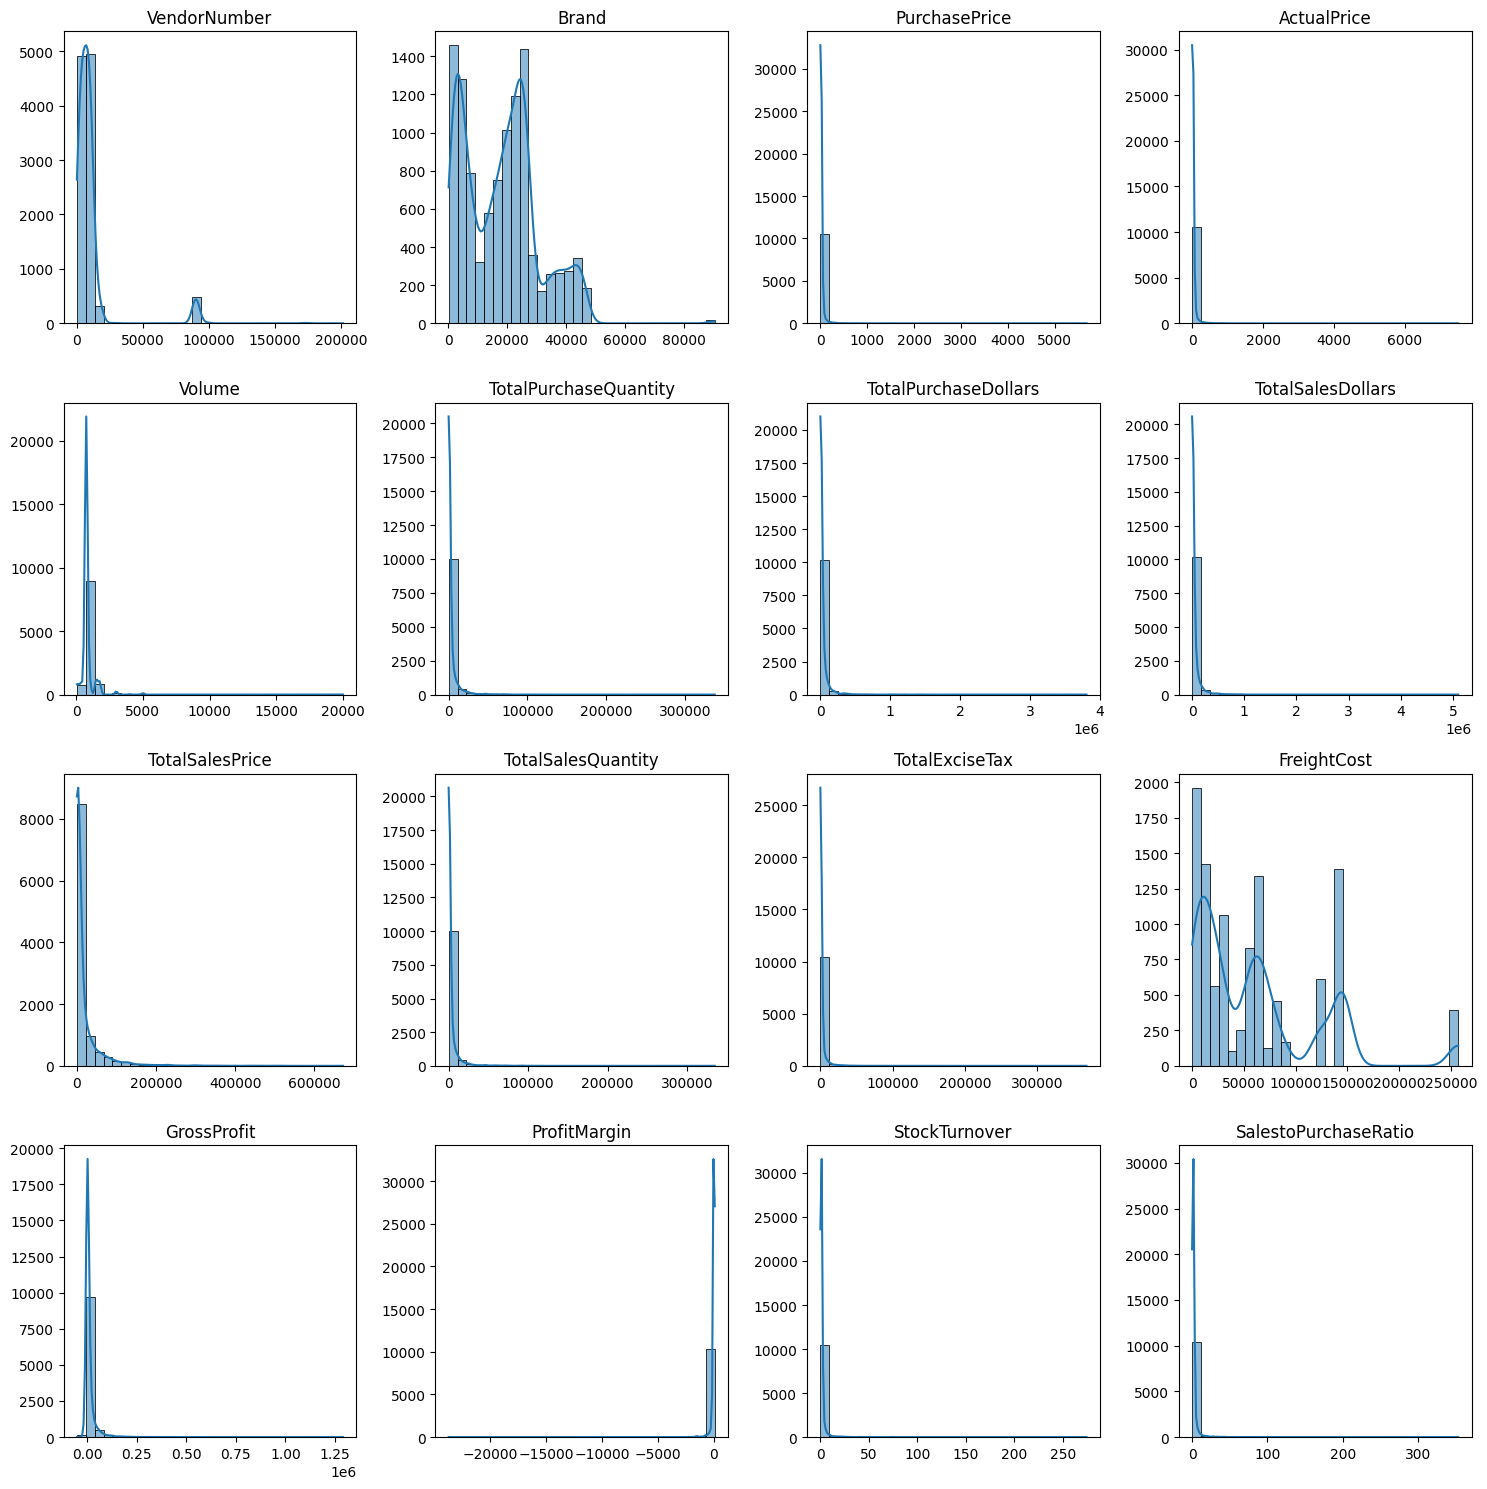

In [8]:
# Creating histogram plots for each numerical column
plt.figure(figsize=(15,15))

for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

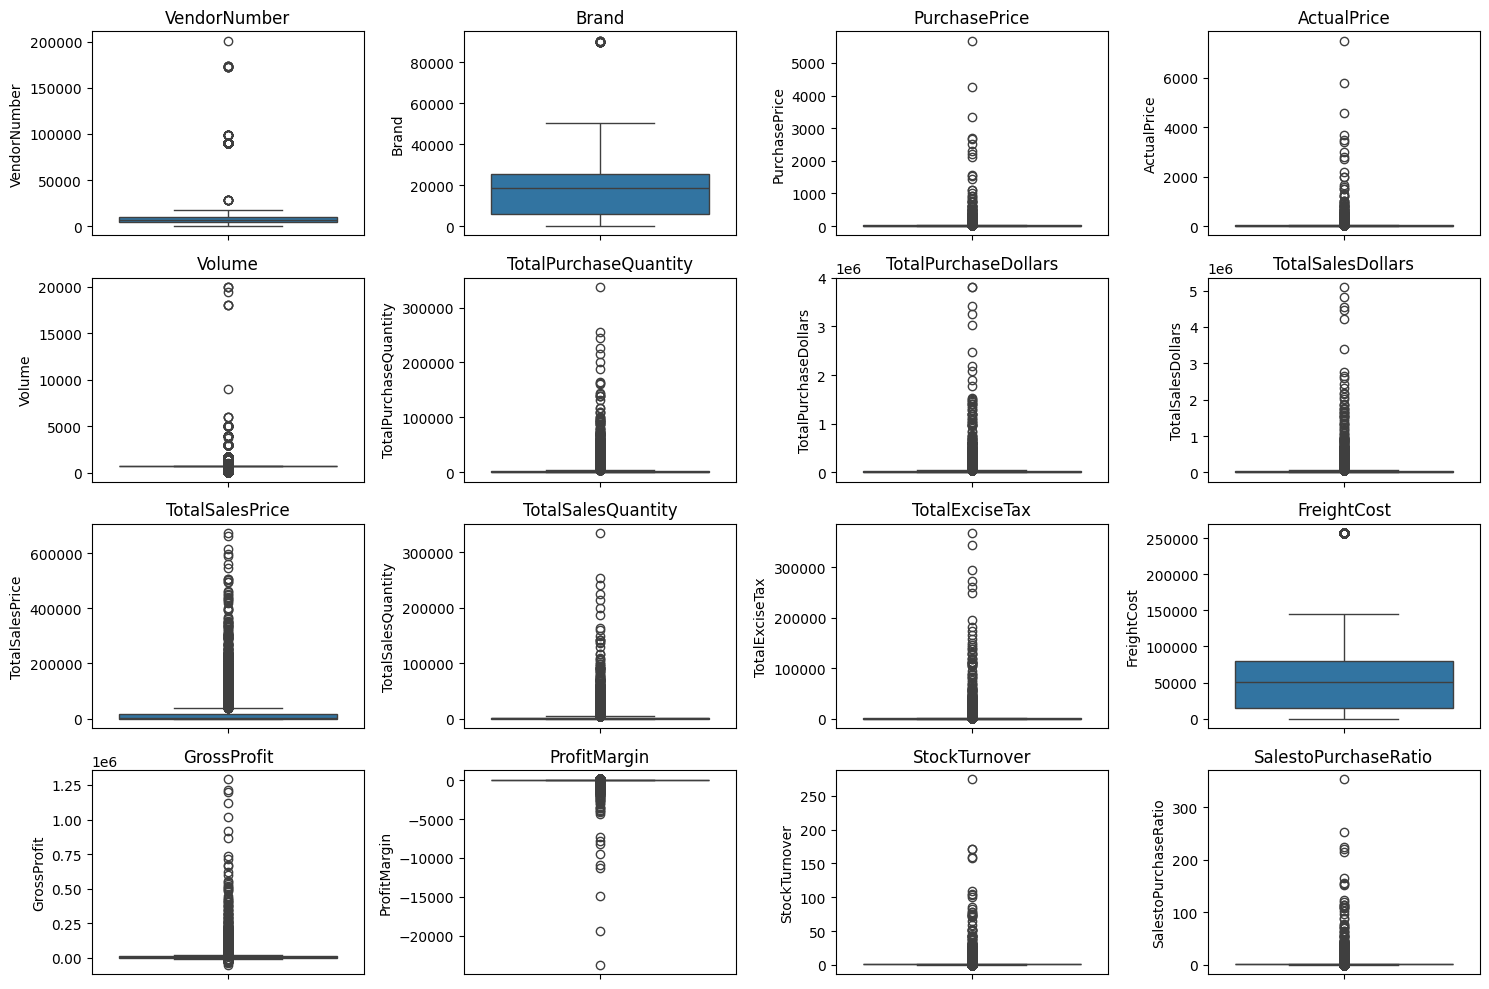

In [9]:
# Outlier detection using Boxplot
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Summary Insights

### Negative and Zero Values
- **Gross Profit**: The minimum value is **-52,000**, indicating losses. Some products may be sold at a loss due to high costs or heavy discounting below the purchase price.
- **Profit Margin**: The presence of **negative infinity** values indicates cases where sales are zero, leading to undefined margins.
- **Total Sales Quantity and Total Sales Dollars**: A minimum value of **0** suggests that some products were purchased but never sold, indicating slow-moving or non-performing inventory.

### Outliers Indicated by High Variability
- **Purchase Price and Actual Price**: Maximum values are significantly higher than the mean, suggesting the presence of premium or high-value products.
- **Freight Cost**: Large variation in freight costs indicates potential inefficiencies or inconsistencies in logistics.
- **Stock Turnover**: High variability suggests uneven inventory movement, with some products selling rapidly while others remain in inventory for extended periods.


In [10]:
# Creating dataframe having only positive Gross Profit and Profit Margin
df= pd.read_sql_query(""" select * from Vendor_Sales_Summary 
where GrossProfit>0 and ProfitMargin>0 and TotalSalesQuantity>0 """,conn)

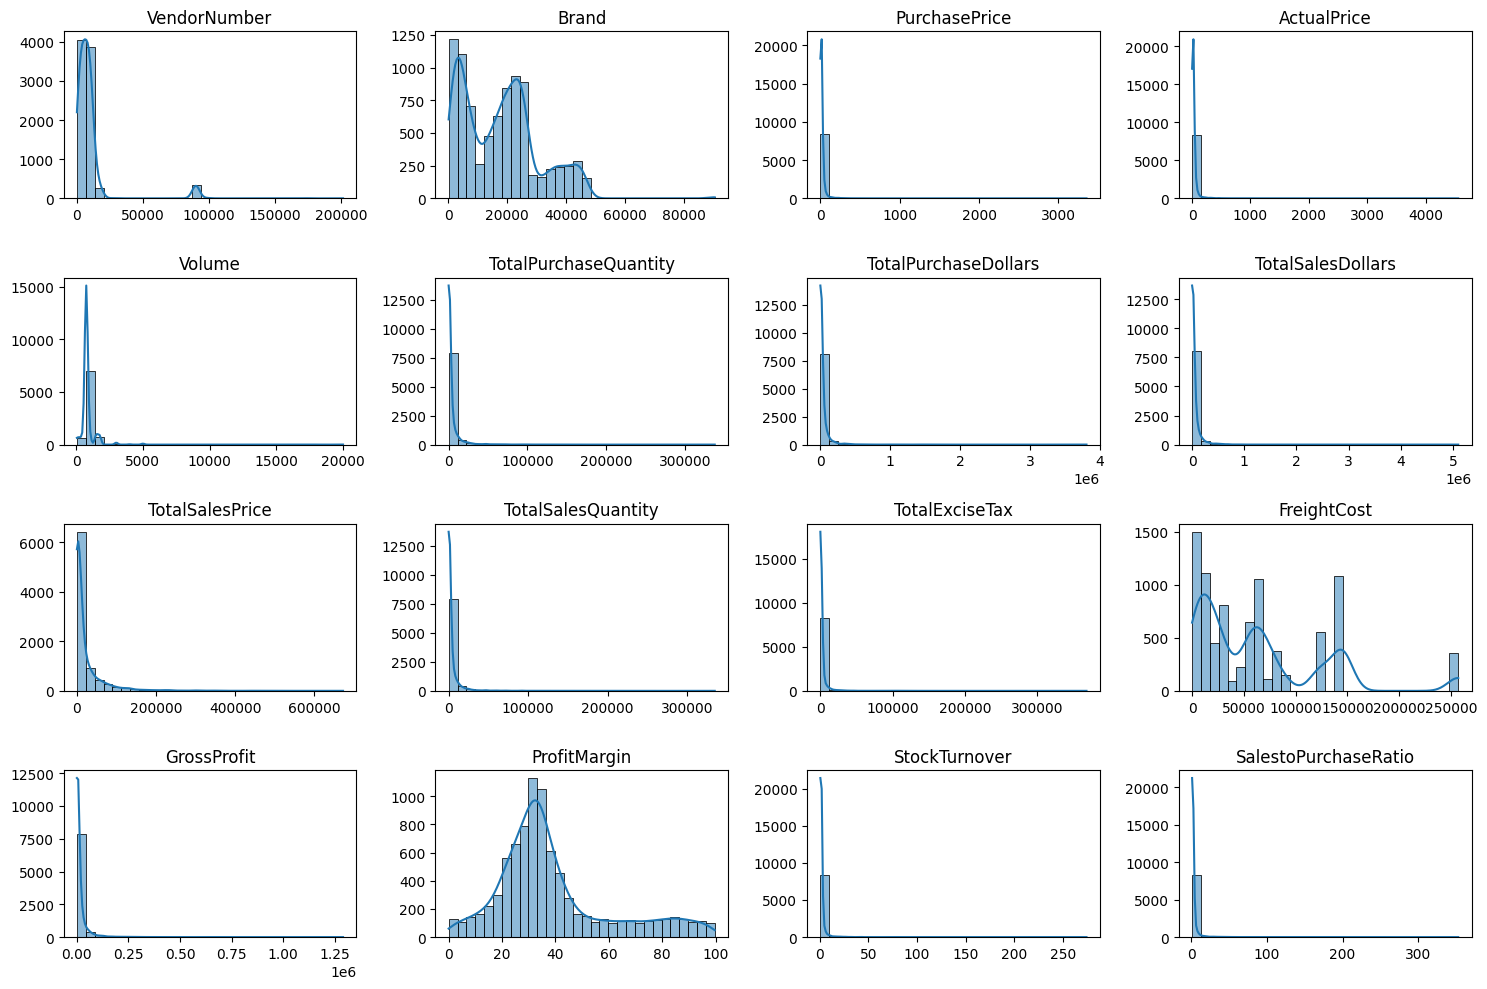

In [11]:
# Creating histogram for each numerical column
plt.figure(figsize=(15,10))

for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [12]:
categorical_cols= ['VendorName','Description']

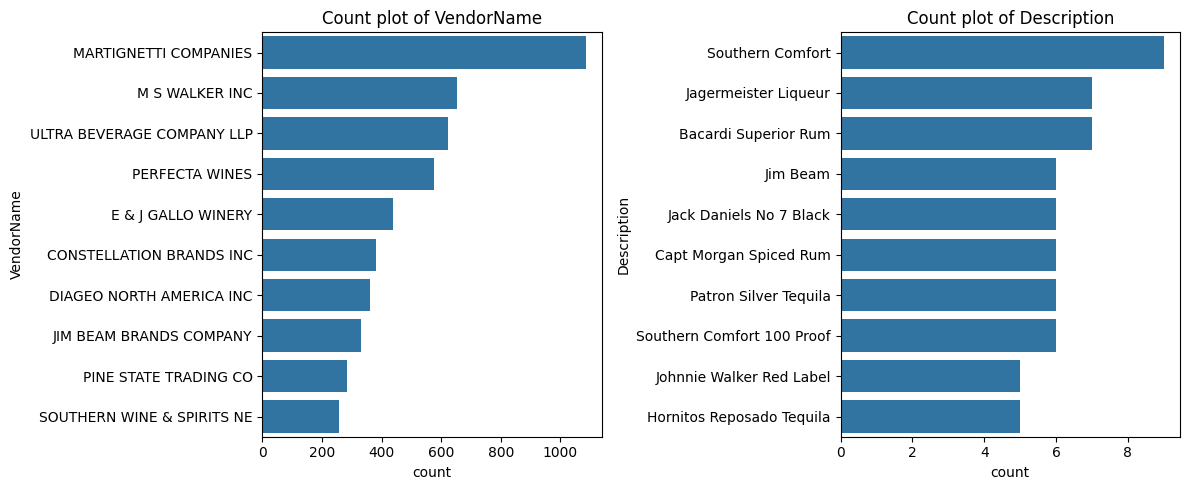

In [13]:
# Count plot for top 10 Vendors and Products
plt.figure(figsize=(12,5))

for i,col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")

plt.tight_layout()
plt.show()

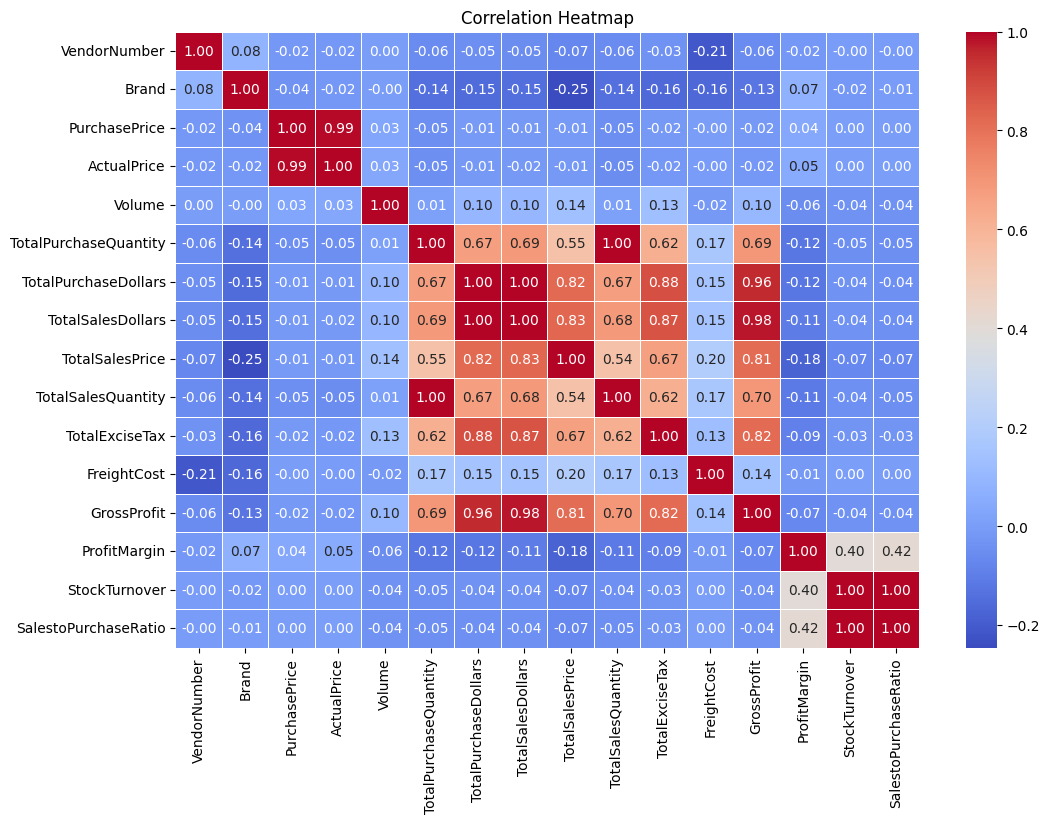

In [14]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix= df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, linewidth=0.5, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights

- **Purchase Price** shows weak correlations with **Total Sales Dollars (-0.012)** and **Gross Profit (-0.016)**, suggesting that price variations have minimal impact on overall sales revenue and profitability.
- There is a **strong positive correlation** between **Total Purchase Quantity** and **Total Sales Quantity (0.999)**, indicating efficient inventory movement.
- A **negative correlation** between **Profit Margin** and **Total Sales Price (-0.179)** suggests that higher sales prices may be associated with lower margins, possibly due to competitive pricing or discounting strategies.
- **Stock Turnover** has weak negative correlations with both **Gross Profit (-0.038)** and **Profit Margin (-0.055)**, indicating that faster inventory turnover does not necessarily translate into higher profitability.

# Data Analysis and Insights:

## Identify brands which need Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [15]:
# Groupby each product on the main dataframe to create new dataframe
brand_performance= df.groupby('Description').agg({'TotalSalesDollars':'sum', 'ProfitMargin':'mean'}).reset_index()

In [16]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.06
1,.nparalleled Svgn Blanc,1094.63,29.98
2,10 Span Cab Svgn CC,2703.89,20.94
3,10 Span Chard CC,3325.56,27.81
4,10 Span Pnt Gris Monterey Cy,2082.22,32.23
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.53
7703,Zuccardi Q Malbec,1639.18,23.98
7704,Zum Rsl,10857.34,32.68
7705,Zwack Liqueur,227.88,16.65


In [17]:
# Define thresholds of 15% for Total Sales and Profit Margin
low_sales_threshold= brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold= brand_performance['ProfitMargin'].quantile(0.85)

In [18]:
print('Low Sales Threshold: ', low_sales_threshold)
print('High Margin Threshold: ', high_margin_threshold)

Low Sales Threshold:  560.299
High Margin Threshold:  64.96799999999995


In [19]:
# Find the target brands which have low sales and high profit margin
target_brands= brand_performance[(brand_performance['TotalSalesDollars']<=low_sales_threshold) 
    & (brand_performance['ProfitMargin']>=high_margin_threshold)]

In [20]:
print('Top 10 Products with High Profit Margins but Low Sales: ')
display(target_brands.sort_values(by=['ProfitMargin', 'TotalSalesDollars'],ascending=[False, True]).head(10))

Top 10 Products with High Profit Margins but Low Sales: 


,Description,TotalSalesDollars,ProfitMargin
6957,The Club Strawbry Margarita,143.28,98.97
452,Bacardi Oakheart Spiced Trav,399.60,98.13
1873,Chi Chi's Chocolate Malt RTD,461.58,98.11
6,12 Days of Pearls Gift Set,309.69,97.68
4592,Mad Dogs & Englishmen Jumil,279.80,97.67
5977,Riunite Sweet White,161.73,97.46
4923,Mojoshot Blue Lagoon RTD,316.80,97.00
2337,DeKuyper Mixed Berry Medley,252.77,96.85
7384,Vigne A Porrona Rosso,272.79,96.83
6236,Sauza Sparkling Margarita,167.76,96.79


### Insights:

These products exhibit **high profit margins** but **low sales volumes**, indicating strong profitability potential. Targeted promotional campaigns or improved visibility could help increase sales without significantly impacting margins.

## Which vendors and brands demonstrate the highest sales performance?

In [21]:
# Top 10 vendors and Products by Sales Performance
top_vendors= df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands= df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [22]:
# Function to format dollar values
def format_dollars(value):
    if value >=1000000:
        return f"{value/1000000:.2f}M"
    elif value >=1000:
        return f"{value/1000:.2f}K"
    else:
        return str(value)

In [23]:
print('Top 10 Vendors by Total Sales Value')
print(top_vendors.apply(lambda x:format_dollars(x)))

Top 10 Vendors by Total Sales Value
VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object


In [24]:
print('Top 10 Products(Brands) by Total Sales Value')
print(top_brands.apply(lambda x:format_dollars(x)))

Top 10 Products(Brands) by Total Sales Value
Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object


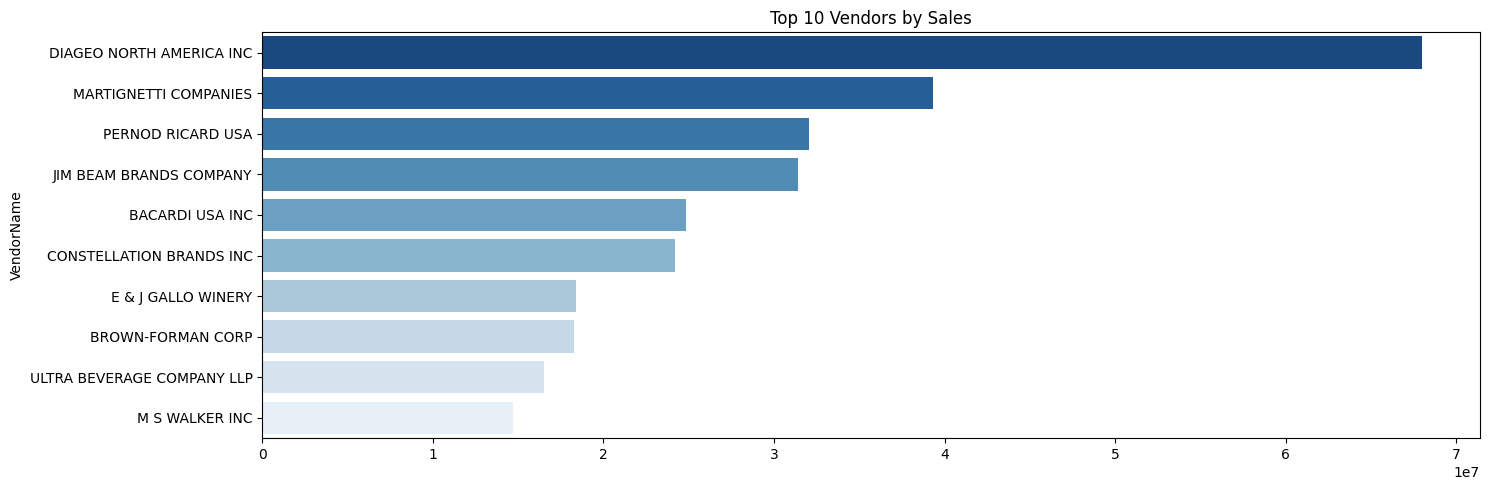

In [25]:
# Barplot for Top 10 vendors by Total Sales
plt.figure(figsize=(15,5))

plt.subplot(1,1,1)
ax1= sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

plt.tight_layout()
plt.show()

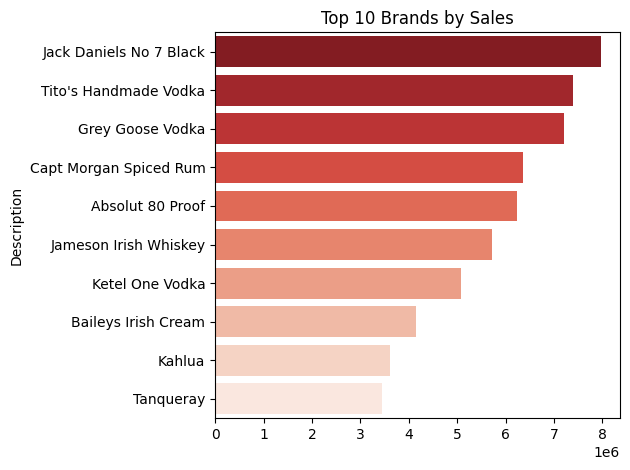

In [26]:
# Barplot for Top 10 Products(Brands) by Total Sales
plt.subplot(1,1,1)
ax1= sns.barplot(y=top_brands.index, x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

plt.tight_layout()
plt.show()

### Insights:

Revenue is heavily concentrated among a few vendors and flagship brands, emphasizing the importance of strategic vendor partnerships while highlighting opportunities to diversify and scale mid-tier performers.

## Which Vendors contribute the most to total purchase dollars?

In [27]:
vendor_performance= df.groupby('VendorName').agg(
    {'TotalPurchaseDollars':'sum', 'GrossProfit':'sum', 'TotalSalesDollars':'sum'}).reset_index()

In [28]:
vendor_performance['PurchaseContribution%']= vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100

In [29]:
vendor_performance.sort_values('PurchaseContribution%',ascending=False,inplace=True)

In [30]:
vendor_performance['PurchaseContribution%']= round(vendor_performance['PurchaseContribution%'],2)

In [31]:
# Display only top 10 vendors
top_vendors= vendor_performance.head(10)
top_vendors['TotalPurchaseDollars']= top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['TotalSalesDollars']= top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['GrossProfit']= top_vendors['GrossProfit'].apply(format_dollars)

In [32]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


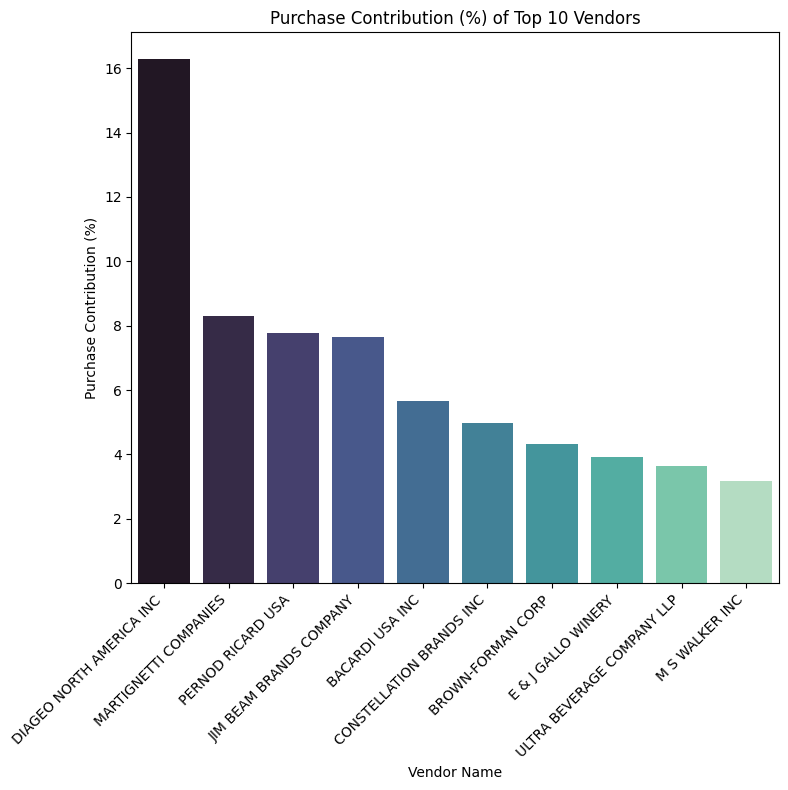

In [33]:
# Plotting the baplot for purchase contribution of Top 10 Vendors by purchase dollars
plt.figure(figsize=(8,8))

sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Vendor Name")
plt.ylabel("Purchase Contribution (%)")
plt.title('Purchase Contribution (%) of Top 10 Vendors')
plt.tight_layout()
plt.show()

### Insights:

A small group of vendors contributes a disproportionately large share of sales and profits, highlighting strong revenue concentration and the critical importance of strategic partnerships with top-performing vendors.

## How much of the total procurement is dependent on the top vendors?

In [34]:
print(f"Total Purchase contribution of top 10 vendors is {round(sum(top_vendors['PurchaseContribution%']),2)}%")

Total Purchase contribution of top 10 vendors is 65.69%


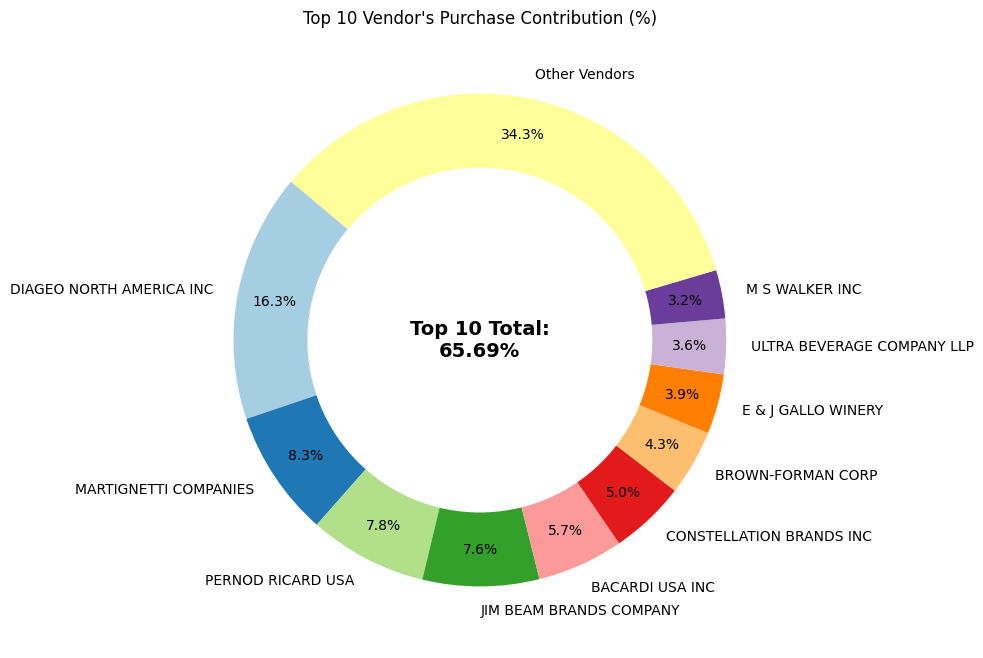

In [35]:
# Plotting Donut chart for Top 10 Vendor's Contribution
vendors = list(top_vendors ['VendorName' ].values)
purchase_contributions = list(top_vendors ['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

centre_circle = plt.Circle((0, 0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0, 0, f"Top 10 Total:\n{total_contribution :.2f}%", fontsize=14, fontweight='bold', ha='center', va='center' )

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

## Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [36]:
df['UnitPurchasePrice']= df['TotalPurchaseDollars']/ df['TotalPurchaseQuantity']

In [37]:
df['OrderSize']= pd.qcut(df['TotalPurchaseQuantity'], q=3, labels={'Small','Medium','Large'})

In [38]:
print('Unit Purchase Price by Order Size')
print(df.groupby('OrderSize')['UnitPurchasePrice'].mean())

Unit Purchase Price by Order Size
OrderSize
Large     39.068186
Medium    15.486414
Small     10.777625
Name: UnitPurchasePrice, dtype: float64


### Insights:

Bulk purchasing significantly reduces unit cost, with large order sizes achieving the lowest unit purchase prices, indicating clear cost advantages at higher purchase volumes.

## Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [39]:
# Vendors having lowest stock inventory turnover
print("Vendors having lowest stock inventory turnover")
print(df[df['StockTurnover']<1].groupby('VendorName')['StockTurnover'].mean().sort_values().head(10))

Vendors having lowest stock inventory turnover
VendorName
ALISA CARR BEVERAGES           0.615400
HIGHLAND WINE MERCHANTS LLC    0.708300
PARK STREET IMPORTS LLC        0.751300
Circa Wines                    0.755677
Dunn Wine Brokers              0.766038
CENTEUR IMPORTS LLC            0.773950
SMOKY QUARTZ DISTILLERY LLC    0.783800
TAMWORTH DISTILLING            0.797100
THE IMPORTED GRAPE LLC         0.807582
WALPOLE MTN VIEW WINERY        0.820533
Name: StockTurnover, dtype: float64


### Insights:

These vendors exhibit low stock turnover, indicating slow-moving inventory and potential overstocking, which may be tying up working capital.

## How much capital is locked in unsold inventory and which vendors contribute the most to it?

In [40]:
df['UnsoldInventoryValue']= (df['TotalPurchaseQuantity']- df['TotalSalesQuantity'])* df['PurchasePrice']

In [41]:
# Finding total Unsold Inventory Value
print('Total Unsold Inventory Value: ',format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Inventory Value:  2.71M


In [42]:
inventory_value_per_vendor= df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

inventory_value_per_vendor= inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue',ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']= inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

In [43]:
print('Top 10 Vendors by Unsold Inventory Value')
inventory_value_per_vendor.head(10)

Top 10 Vendors by Unsold Inventory Value


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### Insights:

A significant portion of unsold inventory value is concentrated among top vendors, indicating capital lock-in and highlighting the need for targeted inventory optimization and demand-alignment strategies.